### 导入依赖，导入数据

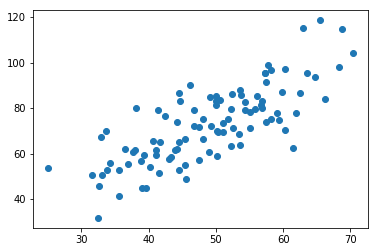

In [2]:
import numpy as np
import matplotlib.pyplot as plt
points = np.genfromtxt('data.csv', delimiter=',')

points[0,0]

# 提取points中的两列数据，分别作为x，y
x = points[:, 0]
y = points[:, 1]

# 用plt画出散点图
plt.scatter(x, y)
plt.show()

### 定义损失函数

In [3]:
def compute_cost(w, b, points):
    total_cost = 0
    M = len(points)
    
    # 逐点计算平方损失误差，然后求平均数
    for i in range(M):
        x = points[i,0]
        y = points[i,1]
        total_cost += (y-w*x-b)**2
    return total_cost/M

### 定义模型的超参数

In [4]:
alpha = 0.0001
initial_w = 0
initial_b = 0
num_iter = 10

### 定义核心梯度下降算法
![](1.png)
![](2.png)

In [6]:
def grad_desc(points, initial_w, initial_b, alpha, num_iter):
    w = initial_w
    b = initial_b
    cost_list = []
    
    for i in range(num_iter):
        cost_list.append( compute_cost(w,b,points) )
        w,b = step_grad_desc(w,b,alpha,points)
    
    return [w,b,cost_list]

def step_grad_desc(current_w,current_b,alpha,points):
    sum_grad_w = 0
    sum_grad_b = 0
    M = len(points)
    
    # 对每个点，代入公式求和
    for i in range(M):
        x = points[i,0]
        y = points[i,1]
        sum_grad_w += (current_w*x+current_b-y)*x
        sum_grad_b += (current_w*x+current_b-y)
    
    # 用公式求当前梯度
    grad_w = 2/M*sum_grad_w
    grad_b = 2/M*sum_grad_b
    
    update_w = current_w - alpha*grad_w
    update_b = current_b - alpha*grad_b
    
    return update_w,update_b

### 测试，运行梯度下降法计算最优的w和b

In [11]:
w,b,cost_list = grad_desc(points,initial_w,initial_b,alpha,num_iter)

In [12]:
w

1.4774173755483797

In [16]:
b

0.02963934787473238

In [17]:
cost_list

[5565.107834483211,
 1484.5865574086483,
 457.85425757376686,
 199.50998572553866,
 134.50591058200533,
 118.14969342239948,
 114.03414906038148,
 112.99857731713661,
 112.73798187568467,
 112.67238435909101]

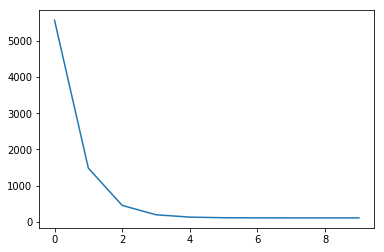

In [15]:
plt.plot(cost_list)
plt.show()

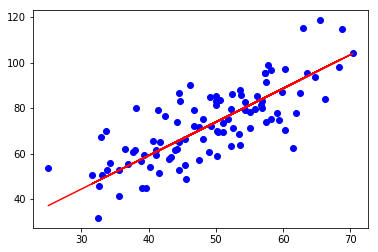

In [19]:
plt.scatter(x,y,c='b')
pred_y = w*x+b
plt.plot(x,pred_y,c='r')
plt.show()